# End to End Heart Diease Classification
This notebook will use Python data science librariees to classify whether if a patient has heart disease or not.

## Steps:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

### 1. Problem Definition
Given clinical parameters of a patient, can we predict whether if he or she has heart disease or not.

### 2. Datta
Data from https://archive.ics.uci.edu/dataset/45/heart+disease

### 3. Evaluation
If a 95% accuracy of predicting whether if a patient has heart diesase, then we'll pursue further

### 4. Features
See above link
s, 0=no) (= the predicted attribute)
### 5. Modelling 

### 6. Experimentation

# Preparing the Tools
We'll use some exploratory data analysis, metrics, evaluation, and models.

In [2]:
# Exploratory data analysis tools
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ML Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Evaluation methods
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

# Load Data

In [3]:
df = pd.read_csv("./data/heart-disease.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Exploratory Data Analysis
- Investigate data, and become an export in it.
- What questions are you trying to solve?
- What kind of data do we have and how do we treat different types?
- What's missing from the data and how do we deal with it?
- Where are and what to do with outliers?
- How do we modify the features to get more out of the data?

In [6]:
# how many patients have heart disease? (1 = yes, 0 = no)
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

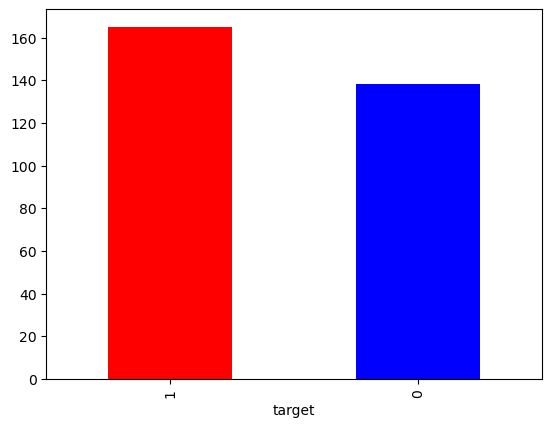

In [36]:
df["target"].value_counts().plot(kind="bar", color=["red","blue"]);

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


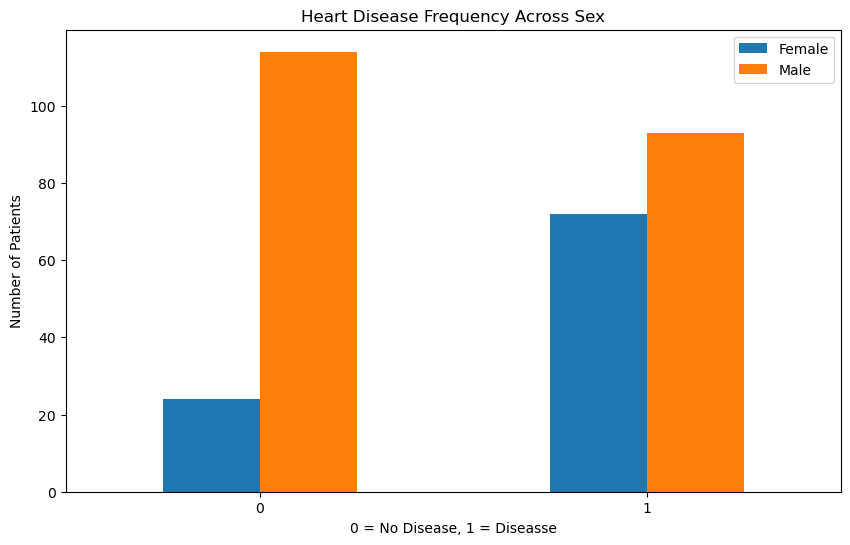

In [35]:
# Compare target to sex of patient
pd.crosstab(df["target"], df["sex"]).plot(kind="bar", figsize=(10,6))
plt.title("Heart Disease Frequency Across Sex")
plt.xlabel("0 = No Disease, 1 = Diseasse")
plt.ylabel("Number of Patients")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0);

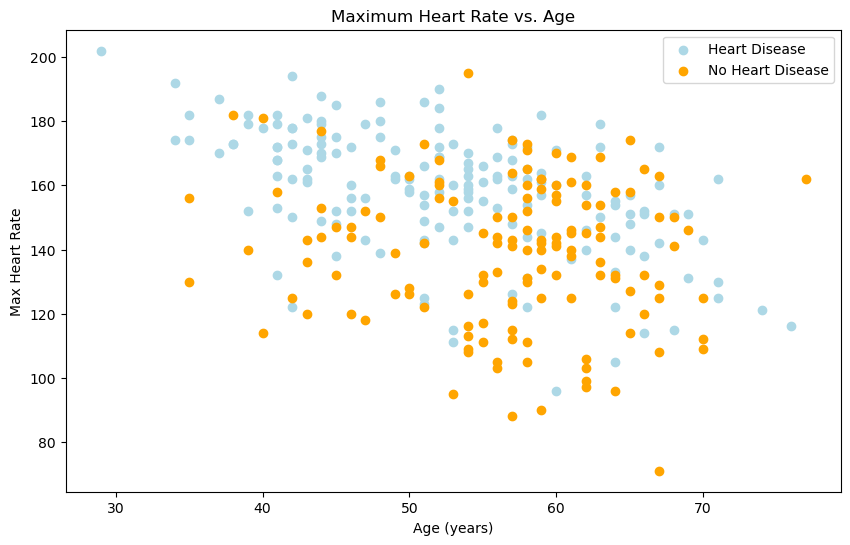

In [40]:
plt.figure(figsize=(10,6))
plt.scatter(df["age"][df["target"]==1],
            df["thalach"][df["target"]==1],
           c="lightblue")
plt.scatter(df["age"][df["target"]==0],
            df["thalach"][df["target"]==0],
           c="orange")
plt.title("Maximum Heart Rate vs. Age")
plt.xlabel("Age (years)")
plt.ylabel("Max Heart Rate") 
plt.legend(["Heart Disease", "No Heart Disease"]);


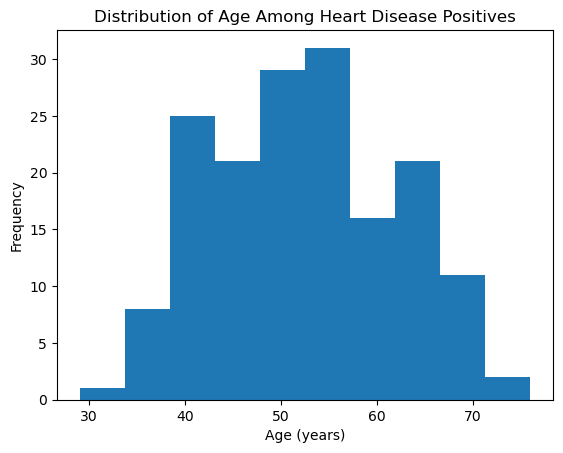

In [52]:
df["age"][df["target"]==1].plot.hist()
plt.title("Distribution of Age Among Heart Disease Positives")
plt.xlabel("Age (years)");

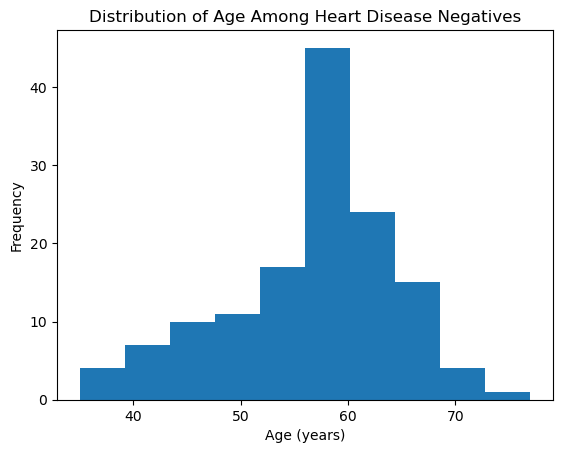

In [51]:
df["age"][df["target"]==0].plot.hist()
plt.title("Distribution of Age Among Heart Disease Negatives")
plt.xlabel("Age (years)");

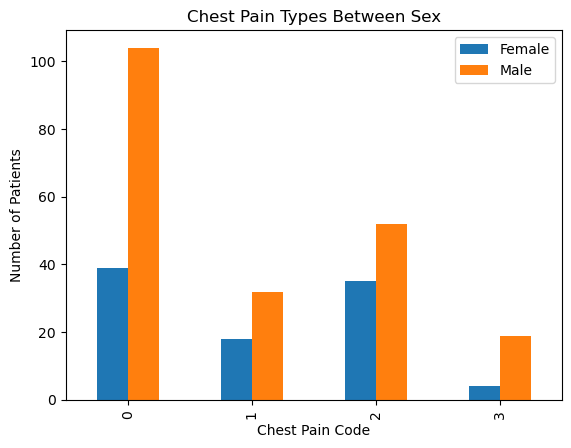

In [57]:
pd.crosstab(df["cp"], df["sex"]).plot(kind="bar")
plt.title("Chest Pain Types Between Sex")
plt.xlabel("Chest Pain Code")
plt.ylabel("Number of Patients")
plt.legend(["Female","Male"]);